<h3>Import Libraries</h3>

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

<h3>Read Data</h3>

In [212]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

<h3>Data Preprocessing</h3> 

In [213]:
pd.isnull(df).sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [214]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [215]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Encode store_and_fwd_flag 

In [216]:
dict_store_and_fwd_flag = {'Y': 1, 'N': 0}
df.replace({'store_and_fwd_flag': dict_store_and_fwd_flag}, inplace=True)

Convert dates to datetime type

In [217]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)

In [218]:
df['hour']=df.pickup_datetime.dt.hour
df['dow']=df.pickup_datetime.dt.dayofweek
df['dom']=df.pickup_datetime.dt.day
df['month']=df.pickup_datetime.dt.month

In [219]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,dow,dom,month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,16,0,29,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,23,4,11,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,17,6,21,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,9,1,5,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,6,2,17,2


In [220]:
df.store_and_fwd_flag.value_counts()

0    725282
1      4040
Name: store_and_fwd_flag, dtype: int64

- Significantly more 0's than 1's 
- I dont think that store_and_fwd_flag has any impact on trip duration
- Additionally, passenger_count has no affect on how long the trip is 

<h3>Linear Regression</h3>

In [221]:
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
            'trip_duration', 'hour', 'dow', 'dom', 'month']
data = df[features]
data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,hour,dow,dom,month
0,-73.953918,40.778873,-73.963875,40.771164,400,16,0,29,2
1,-73.988312,40.731743,-73.994751,40.694931,1100,23,4,11,3
2,-73.997314,40.721458,-73.948029,40.774918,1635,17,6,21,2
3,-73.961670,40.759720,-73.956779,40.780628,1141,9,1,5,1
4,-74.017120,40.708469,-73.988182,40.740631,848,6,2,17,2


In [222]:
x = data
y = df['trip_duration']
x.shape, y.shape

((729322, 9), (729322,))

In [223]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 57)

In [224]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [225]:
lr = LR()
lr.fit(train_x, train_y)

LinearRegression()

In [226]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Train MAE: ', k)

Train MAE:  2.615675555329821e-12


In [227]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test MAE: ', k)

Test MAE:  2.5696901356690125e-12


Train and test MAE are very similar!

In [228]:
from sklearn.feature_selection import RFE
y_all = df.trip_duration

# Create the RFE object and rank each feature
model = LR()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(data, y_all)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [229]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = data.columns
ranking_df['Rank'] = rfe.ranking_

In [230]:
ranked = ranking_df.sort_values(by=['Rank'])
ranked

,Feature_name,Rank
4,trip_duration,1
3,dropoff_latitude,2
0,pickup_longitude,3
1,pickup_latitude,4
2,dropoff_longitude,5
8,month,6
6,dow,7
5,hour,8
7,dom,9


Date items seem to be the least significant features in our model

In [231]:
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
            'trip_duration']
data = df[features]

In [232]:
x = data
y = df['trip_duration']

In [233]:
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 57)

In [234]:
lr = LR()
lr.fit(train_x, train_y)

LinearRegression()

In [235]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Train MAE: ', k)

Train MAE:  2.3002743888557777e-12


In [236]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test MAE: ', k)

Test MAE:  2.26721406035572e-12


Our model ran better when date features were removed

<h3>Parameters of Linear Regression</h3>

In [238]:
lr.coef_

array([-6.34165115e-11,  1.58639325e-11, -1.24390245e-12,  2.80182461e-11,
        1.00000000e+00])

In [239]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
60035,888,888.0,-2.273737e-13
108847,620,620.0,9.094947e-13
169963,416,416.0,7.958079e-13
644912,549,549.0,1.136868e-13
717525,328,328.0,2.046363e-12


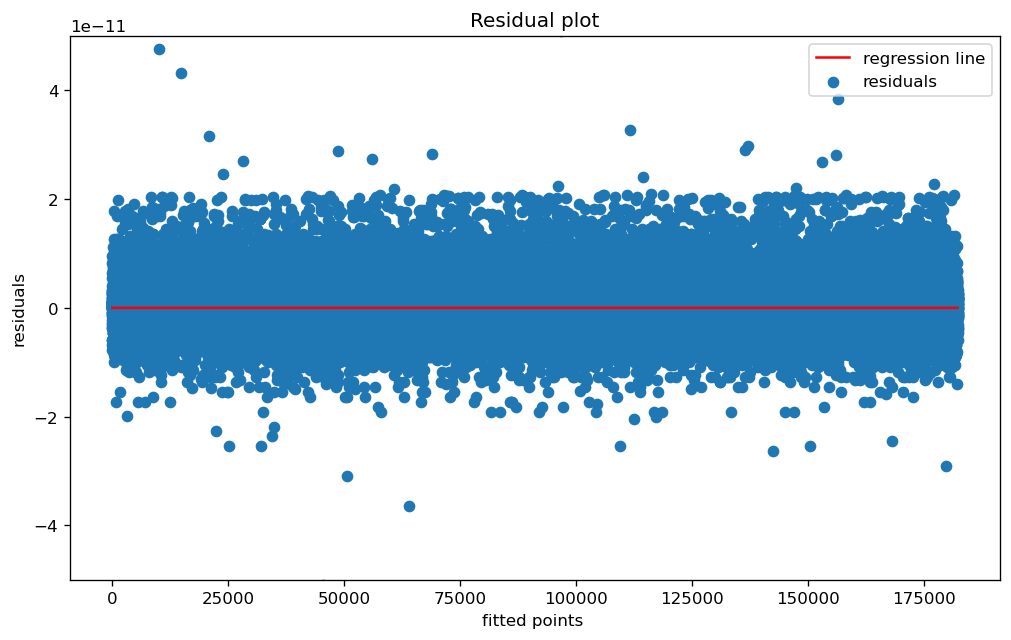

In [240]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,182331)
k = [0 for i in range(0,182331)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-5e-11, 5e-11)
plt.legend()

Variance of the error on the residual plot is nearly constant

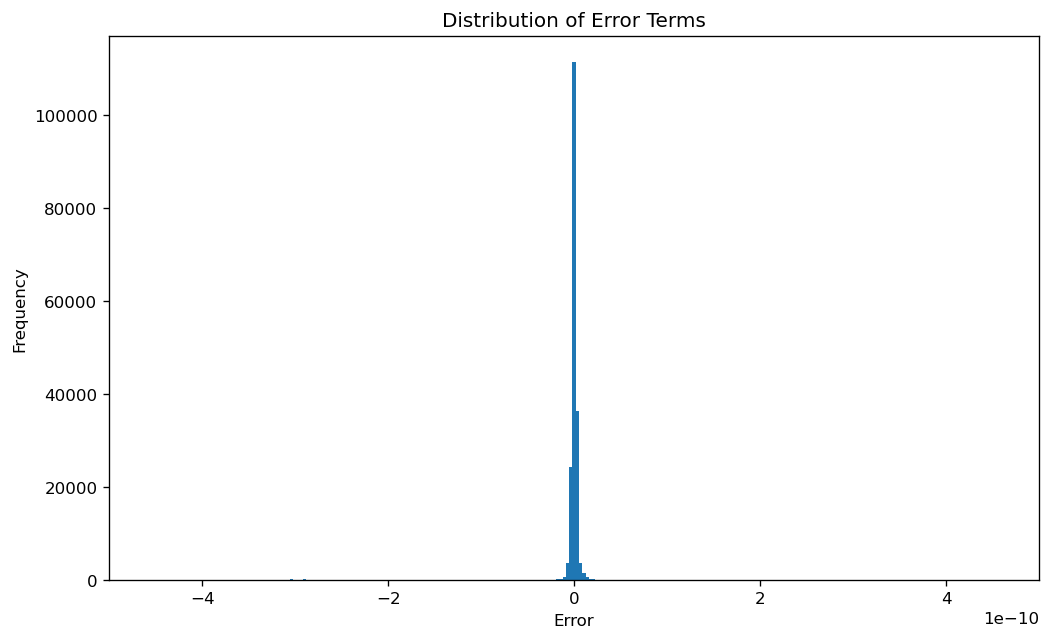

In [241]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 1000)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.xlim(-0.5e-9, 0.5e-9)
plt.show()

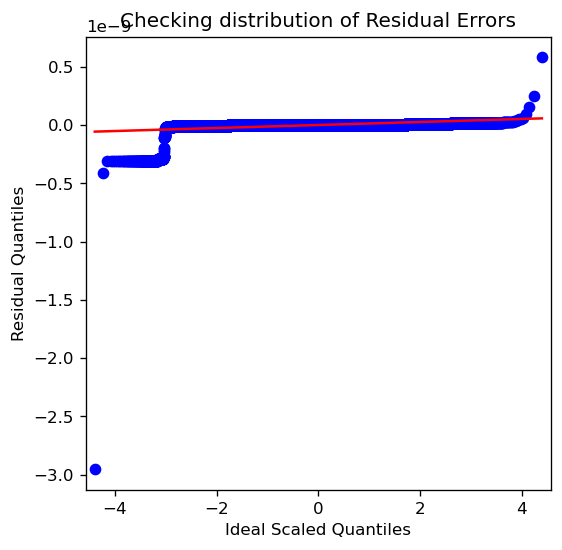

In [242]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

As seen with the histogram, we have a somewhat normal looking plot and since we know our errors have a low variance, that resuts in the tall skinny normal curve

From the qqplot we see that near the ends that the data skews from normal slightly

<h3>Normalize Model</h3>

In [243]:
lr = LR(normalize=True)

lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [244]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Train MAE', k )

Train MAE 3.2698348774684225e-12


In [245]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test MAE', k )

Test MAE 3.2009095744904177e-12


When normalized, the model performed very well, giving very small error values